In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


<Axes: >

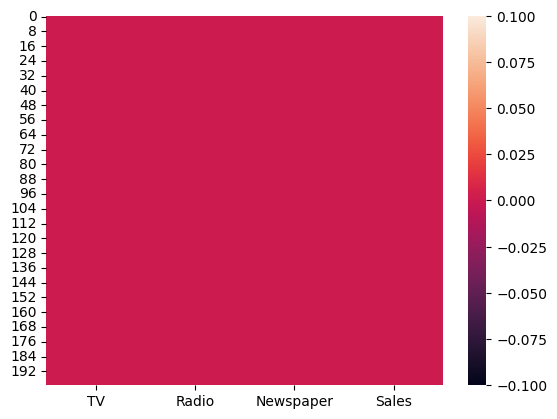

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.59,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression()
lmodel.fit(x_train,y_train)

LinearRegression()

In [11]:
inp=[[230.1,	37.8,	69.2]]
yp=lmodel.predict(inp)
print("Predicted sales: ",yp)

Predicted sales:  [21.2079351]


In [12]:
y_pred = lmodel.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.2885326183389547
R-squared: 0.8703889431040615


In [14]:
from sklearn.model_selection import KFold,cross_val_score
mykfold=KFold(n_splits=5)

In [15]:
mysc=cross_val_score(lmodel,x_test,y_test,cv=mykfold)
print("Measures of the folds: ",mysc)
print("Cross vaidation score: ",mysc.mean())

Measures of the folds:  [0.8094379  0.92306691 0.89609685 0.92929674 0.86537287]
Cross vaidation score:  0.8846542535622041


## Conclusion

*   The dataset contains 200 rows and 4 useful columns.
*   The columns are TV ,Radio, Newspaper showing their sales and Sales column showing the total sales of the record.
*   The average sales of TV, Radio, Newspaper and Sales are 147.0425,	23.2640,	30.5540,	14.0225
*  Total count of 200 TV,Newspaper and Radio are sold.
* The dataset has no null values and have correct datatypes  for the columns.
* The accuracy of the model fitting can be uderstood by seeing Mean Squared Error: 3.2885 and R-squared: 0.8704
* The accuracy of the predictions done using the trained model can be understood by seeing Cross vaidation score:  0.8847